In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import statsmodels
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import os
import seaborn as sns
import umap 
from sklearn.preprocessing import StandardScaler
import gseapy as gp

C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
figure_save_path = r'F:\SMAD PROJECT\new_druganalysis\multi\figures'
file_save_path = r'F:\SMAD PROJECT\new_druganalysis\multi\files'

In [4]:
df_meta = pd.read_csv(r'F:\SMAD PROJECT\new_druganalysis\metabolome\test\files\metabolome_after_Normalization and imputation and BC2.csv',index_col = 0)
df_pro =  pd.read_csv(r'F:\SMAD PROJECT\new_druganalysis\proteome\test\files\proteome_after_Normalization and imputation and BC.csv',index_col = 0)

In [5]:
df_pro

,Acamprosate1,Acamprosate2,Acamprosate3,Acamprosate4,Acamprosate5,Acamprosate6,Acenocoumarol1,Acenocoumarol2,Acenocoumarol3,Acenocoumarol4,...,Yohimbine3,Yohimbine4,Yohimbine5,Yohimbine6,Zaltoprofen1,Zaltoprofen2,Zaltoprofen3,Zaltoprofen4,Zaltoprofen5,Zaltoprofen6
1/contam_sp|P00761|TRYP_PIG,125.991396,133.107707,108.751144,116.453052,109.468314,126.893530,115.643407,104.805719,123.291487,88.672599,...,110.777190,136.440074,144.963472,86.650160,102.533341,117.369796,79.679171,107.067307,87.701389,118.506032
1/contam_sp|P02769|ALBU_BOVIN,99.745318,95.948386,104.395786,105.960974,133.955275,137.618259,113.903938,91.840000,117.396238,88.649254,...,114.914345,105.639967,97.850435,99.300241,116.415954,114.466779,125.801094,108.064839,90.298852,97.705766
1/sp|A6NHQ2|FBLL1_HUMAN,8.040628,8.161789,6.133581,6.173820,5.606534,5.651277,4.195665,7.879693,8.294884,7.495291,...,7.438408,7.712398,10.714439,8.826348,4.224697,4.207488,4.850984,6.971732,5.679872,5.660090
1/sp|O00148|DX39A_HUMAN,17.387124,16.203218,18.502166,16.800376,15.593527,17.876693,17.039457,18.830061,19.091362,13.682992,...,18.230284,17.272146,19.110754,17.325849,18.641324,19.425617,21.317109,18.972414,18.025276,19.366718
1/sp|O00154|BACH_HUMAN,2.423423,2.282892,2.317733,2.219701,2.000475,2.185573,2.518255,2.232644,2.131480,2.609549,...,2.225497,2.409188,2.373959,1.864807,1.742362,2.304404,2.018579,2.423026,2.443092,2.728205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/sp|P55854|SUMO3_HUMAN/sp|P61956|SUMO2_HUMAN/sp|Q6EEV6|SUMO4_HUMAN,7.206277,8.832019,8.911311,7.014207,6.190739,7.576220,8.228504,6.110483,6.698327,6.882694,...,7.847688,7.336041,7.370426,6.812419,7.059344,7.343658,7.188345,7.378640,6.912069,7.898879
3/sp|Q08170|SRSF4_HUMAN/sp|Q13243|SRSF5_HUMAN/sp|Q13247|SRSF6_HUMAN,29.556073,24.124489,18.956997,24.042871,28.439925,25.479002,23.742755,24.687093,27.570770,27.677680,...,26.615287,29.053850,25.116664,25.098699,25.934405,24.390130,19.574913,20.278828,26.742488,28.247815
3/sp|Q14141|SEPT6_HUMAN/sp|Q92599|SEPT8_HUMAN/sp|Q9NVA2|SEP11_HUMAN,4.417954,3.793299,3.065270,3.706176,3.536975,3.828451,3.152030,3.149546,3.977607,3.873109,...,3.155322,3.341151,3.461722,3.752264,3.540330,3.516325,3.452538,4.072434,3.533420,3.419978
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,12.488808,12.506224,12.286080,9.816656,22.839021,23.310466,11.708654,13.764356,11.699267,15.695296,...,10.398421,11.816038,16.479133,13.411972,14.081217,15.563383,17.024310,14.507120,14.707976,15.880916


In [6]:
sorted_columns = sorted(df_pro.columns)

# Reindex DataFrame with sorted columns
df_sorted = df_pro[sorted_columns]
df_sorted

,Acamprosate1,Acamprosate2,Acamprosate3,Acamprosate4,Acamprosate5,Acamprosate6,Acenocoumarol1,Acenocoumarol2,Acenocoumarol3,Acenocoumarol4,...,Yohimbine3,Yohimbine4,Yohimbine5,Yohimbine6,Zaltoprofen1,Zaltoprofen2,Zaltoprofen3,Zaltoprofen4,Zaltoprofen5,Zaltoprofen6
1/contam_sp|P00761|TRYP_PIG,125.991396,133.107707,108.751144,116.453052,109.468314,126.893530,115.643407,104.805719,123.291487,88.672599,...,110.777190,136.440074,144.963472,86.650160,102.533341,117.369796,79.679171,107.067307,87.701389,118.506032
1/contam_sp|P02769|ALBU_BOVIN,99.745318,95.948386,104.395786,105.960974,133.955275,137.618259,113.903938,91.840000,117.396238,88.649254,...,114.914345,105.639967,97.850435,99.300241,116.415954,114.466779,125.801094,108.064839,90.298852,97.705766
1/sp|A6NHQ2|FBLL1_HUMAN,8.040628,8.161789,6.133581,6.173820,5.606534,5.651277,4.195665,7.879693,8.294884,7.495291,...,7.438408,7.712398,10.714439,8.826348,4.224697,4.207488,4.850984,6.971732,5.679872,5.660090
1/sp|O00148|DX39A_HUMAN,17.387124,16.203218,18.502166,16.800376,15.593527,17.876693,17.039457,18.830061,19.091362,13.682992,...,18.230284,17.272146,19.110754,17.325849,18.641324,19.425617,21.317109,18.972414,18.025276,19.366718
1/sp|O00154|BACH_HUMAN,2.423423,2.282892,2.317733,2.219701,2.000475,2.185573,2.518255,2.232644,2.131480,2.609549,...,2.225497,2.409188,2.373959,1.864807,1.742362,2.304404,2.018579,2.423026,2.443092,2.728205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/sp|P55854|SUMO3_HUMAN/sp|P61956|SUMO2_HUMAN/sp|Q6EEV6|SUMO4_HUMAN,7.206277,8.832019,8.911311,7.014207,6.190739,7.576220,8.228504,6.110483,6.698327,6.882694,...,7.847688,7.336041,7.370426,6.812419,7.059344,7.343658,7.188345,7.378640,6.912069,7.898879
3/sp|Q08170|SRSF4_HUMAN/sp|Q13243|SRSF5_HUMAN/sp|Q13247|SRSF6_HUMAN,29.556073,24.124489,18.956997,24.042871,28.439925,25.479002,23.742755,24.687093,27.570770,27.677680,...,26.615287,29.053850,25.116664,25.098699,25.934405,24.390130,19.574913,20.278828,26.742488,28.247815
3/sp|Q14141|SEPT6_HUMAN/sp|Q92599|SEPT8_HUMAN/sp|Q9NVA2|SEP11_HUMAN,4.417954,3.793299,3.065270,3.706176,3.536975,3.828451,3.152030,3.149546,3.977607,3.873109,...,3.155322,3.341151,3.461722,3.752264,3.540330,3.516325,3.452538,4.072434,3.533420,3.419978
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,12.488808,12.506224,12.286080,9.816656,22.839021,23.310466,11.708654,13.764356,11.699267,15.695296,...,10.398421,11.816038,16.479133,13.411972,14.081217,15.563383,17.024310,14.507120,14.707976,15.880916


In [7]:
def bh_correction(p_values):
    _, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    return pvals_corrected

In [8]:
#  calculate mean values of each drug, dmso and dfo 
def get_any_replicates(df=df_sorted, intervalx = 6,num_chunksx = 72):
    dmso = df.filter(regex='DMSO', axis=1)
    dfo = df.filter(regex='DFO', axis=1)
    drugs = df.loc[:, ~df_sorted.columns.str.contains('DMSO|DFO')]
    chunksx = []
    total_columnsx = drugs.shape[1]
    mean_dictx = {}
    mean_dictx['DMSO'] = dmso.mean(axis = 1).tolist()
    mean_dictx['DFO'] = dfo.mean(axis = 1).tolist()  
    for i in range(0, total_columnsx, 6):
        # Create a chunk by slicing the DataFrame
        drugmeanx = drugs.iloc[:, i:i+intervalx].mean(axis = 1).tolist()
        drugname4x = re.sub(r'\d+', '', drugs.iloc[:, i:i+6].columns[1])
        mean_dictx[drugname4x] = drugmeanx
    df_meanx = pd.DataFrame(mean_dictx)  
    return df_meanx

In [11]:
mean6 = get_any_replicates(df=df_sorted, intervalx = 6,num_chunksx = 72)
mean5 = get_any_replicates(df=df_sorted, intervalx = 5,num_chunksx = 72)
mean4 = get_any_replicates(df=df_sorted, intervalx = 4,num_chunksx = 72)
mean3 = get_any_replicates(df=df_sorted, intervalx = 3,num_chunksx = 72)
mean2 = get_any_replicates(df=df_sorted, intervalx = 2,num_chunksx = 72)
mean1 = get_any_replicates(df=df_sorted, intervalx = 1,num_chunksx = 72)

In [12]:
def get_fold_change(dfdf = mean1):
    col_1 = dfdf.iloc[:, 0]
    df_div_col_1 = dfdf.apply(lambda col: col / col_1, axis=0)
    # wo_updown = df_minus_col_1.iloc[:,1:]
    return df_div_col_1

In [13]:
len(get_fold_change(dfdf = mean4).values.flatten())

74888

In [21]:
from scipy import stats

def get_pvalues(num = 3,dfdf = df_sorted):
    dmso = dfdf.filter(regex='DMSO', axis=1)
    dfo = dfdf.filter(regex='DFO', axis=1)
    drugs = dfdf.loc[:, ~df_sorted.columns.str.contains('DMSO|DFO')]
    total_columns = drugs.shape[1]
    results_dict_w = {}
    results_dict_t = {}
    interval = 6
    for i in range(0, total_columns, interval):
        # Create a chunk by slicing the DataFrame
        drugname = re.sub(r'\d+', '', drugs.iloc[:, i:i+6].columns[1])
        results_t = []
        results_w = []

        for j in range(drugs.shape[0]):
            dmsopro = dmso.iloc[j, :72].tolist()
            drugpro = drugs.iloc[j, i:i+num].tolist()

            # Calculate the p-value of the t-test between drug and DMSO profiles
            pval_t = stats.ttest_ind(drugpro, dmsopro, equal_var=False)[1]
            pval_w = mannwhitneyu(drugpro, dmsopro)[1]
            results_t.append(pval_t)
            results_w.append(pval_w)

        results_dict_t[drugname] = results_t
        results_dict_w[drugname] = results_w
    dysregulated = pd.DataFrame(results_dict_t)
    dysregulated2 = pd.DataFrame(results_dict_w)
    return [dysregulated,dysregulated2]


def get_sem(num = 3,dfdf = df_sorted):
    dmso = dfdf.filter(regex='DMSO', axis=1)
    dfo = dfdf.filter(regex='DFO', axis=1)
    drugs = dfdf.loc[:, ~df_sorted.columns.str.contains('DMSO|DFO')]
    total_columns = drugs.shape[1]
    results_dict_v= {}
    interval = 6
    for i in range(0, total_columns, interval):
        # Create a chunk by slicing the DataFrame
        drugname = re.sub(r'\d+', '', drugs.iloc[:, i:i+6].columns[1])
        results_v = []
        for j in range(drugs.shape[0]):
#             dmsopro = dmso.iloc[j, :72].tolist()
            drugpro = drugs.iloc[j, i:i+num].tolist()
            # Calculate the p-value of the t-test between drug and DMSO profiles
            # vari = np.var(drugpro)
            SEM  = stats.sem(drugpro)

            results_v.append(SEM)           
        results_dict_v[drugname] = results_v
    dysregulated = pd.DataFrame(results_dict_v)
    return dysregulated 

def get_cv(num = 3,dfdf = df_sorted):
    dmso = dfdf.filter(regex='DMSO', axis=1)
    dfo = dfdf.filter(regex='DFO', axis=1)
    drugs = dfdf.loc[:, ~df_sorted.columns.str.contains('DMSO|DFO')]
    total_columns = drugs.shape[1]
    results_dict_v= {}
    interval = 6
    for i in range(0, total_columns, interval):
        # Create a chunk by slicing the DataFrame
        drugname = re.sub(r'\d+', '', drugs.iloc[:, i:i+6].columns[1])
        results_v = []
        for j in range(drugs.shape[0]):
#             dmsopro = dmso.iloc[j, :72].tolist()
            drugpro = drugs.iloc[j, i:i+num].tolist()
            # Calculate the p-value of the t-test between drug and DMSO profiles
#             vari = np.var(drugpro)
            mean = np.mean(drugpro)
            std_dev = np.std(drugpro)
            cv = std_dev / mean
            results_v.append(cv)           
        results_dict_v[drugname] = results_v
    dysregulated = pd.DataFrame(results_dict_v)
    return dysregulated 

In [17]:
get_cv(num = 6,dfdf = df_sorted)

,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,Bromfenac,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
0,0.076396,0.148900,0.109354,0.112633,0.044647,0.160726,0.067722,0.087373,0.058472,0.115945,...,0.107692,0.145448,0.067810,0.117224,0.078967,0.084216,0.154703,0.118420,0.161427,0.140584
1,0.146174,0.102089,0.086263,0.135181,0.082280,0.173526,0.075118,0.169217,0.122802,0.054874,...,0.073669,0.060476,0.103752,0.048175,0.098711,0.044189,0.094376,0.088367,0.063858,0.109087
2,0.160575,0.234371,0.347207,0.188325,0.245103,0.306665,0.238056,0.352433,0.244680,0.289096,...,0.298827,0.277150,0.161882,0.158350,0.314146,0.269374,0.408551,0.198010,0.229370,0.183680
3,0.057659,0.104171,0.068390,0.051083,0.068331,0.060756,0.075691,0.036534,0.047348,0.062883,...,0.070682,0.067442,0.020001,0.112881,0.046271,0.075365,0.062688,0.071791,0.047279,0.052925
4,0.058324,0.069143,0.093117,0.028503,0.049092,0.052181,0.075144,0.086584,0.042756,0.080404,...,0.045398,0.090697,0.073548,0.060136,0.048948,0.079177,0.040372,0.079879,0.131126,0.139580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.128097,0.096390,0.057392,0.071344,0.048714,0.105156,0.071730,0.064609,0.127505,0.157170,...,0.049483,0.064366,0.066532,0.086746,0.070486,0.103359,0.029314,0.058860,0.088951,0.042886
1008,0.137013,0.060494,0.099877,0.051759,0.043603,0.072275,0.062977,0.041158,0.041481,0.070445,...,0.105491,0.177455,0.055757,0.091977,0.102007,0.283293,0.052310,0.048283,0.053342,0.133567
1009,0.107755,0.091426,0.106078,0.072550,0.090717,0.046284,0.101757,0.105244,0.032239,0.067232,...,0.039122,0.096797,0.042041,0.092304,0.087281,0.101410,0.100537,0.067727,0.076063,0.061426
1010,0.348013,0.122687,0.054947,0.082478,0.091581,0.101943,0.093521,0.217170,0.083071,0.149982,...,0.071263,0.148634,0.048387,0.091882,0.062399,0.084171,0.101880,0.109807,0.141357,0.064531


In [22]:
get_variance(num = 3,dfdf = df_sorted)

,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,Bromfenac,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
0,7.230761,5.362795,6.577676,13.600370,4.741557,4.620620,4.324652,6.138775,4.063576,7.894412,...,8.245127,17.503831,6.705136,8.066474,2.786614,5.686156,16.595678,13.139914,4.142735,10.962098
1,2.442700,8.000468,5.296555,12.555379,5.908104,2.586687,3.906421,7.010545,2.838119,3.732089,...,1.642573,3.639933,4.101859,0.459353,4.121525,1.821998,2.797721,6.779004,5.780526,3.498784
2,0.656808,1.302733,2.068266,0.328121,1.261144,1.266769,1.250876,0.415727,1.307736,1.783368,...,0.942369,1.340345,0.206727,0.543687,1.265385,1.013497,1.430508,1.048523,1.103597,0.211689
3,0.663748,0.644845,0.411837,0.715654,0.248028,0.689485,0.359051,0.442701,0.680287,0.544088,...,0.479948,0.378375,0.253110,0.994922,0.096080,1.123939,0.254576,0.682683,0.527377,0.794169
4,0.042251,0.115807,0.166137,0.045063,0.063032,0.103688,0.082911,0.065337,0.031208,0.146404,...,0.077068,0.098962,0.087351,0.126519,0.034129,0.088423,0.071248,0.093245,0.229199,0.162255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.555601,0.631269,0.395910,0.266148,0.361140,0.640039,0.166715,0.377888,0.624062,1.156762,...,0.222340,0.069530,0.271459,0.352033,0.454922,0.361358,0.136796,0.098175,0.540529,0.082191
1008,3.060006,1.151354,1.070915,0.462476,0.681198,0.847982,0.512852,0.582284,0.090194,1.515536,...,0.738172,0.387064,0.835887,0.553122,2.285927,5.082330,0.879940,1.179028,0.364712,1.915061
1009,0.390866,0.275607,0.371249,0.223995,0.338046,0.134582,0.370802,0.351904,0.125288,0.213503,...,0.099003,0.361519,0.130352,0.318956,0.245789,0.306212,0.178047,0.157548,0.229755,0.026196
1010,0.070658,0.686804,0.342637,0.655045,0.833425,1.111770,0.300831,1.204781,0.765145,1.362704,...,0.188791,0.983064,0.475501,0.461270,0.465516,0.660422,0.549777,1.236271,0.919431,0.849605


In [23]:
get_variance(num = 4,dfdf = df_sorted)

,Acamprosate,Acenocoumarol,Adenosylcobalamin,Aminophylline,Asenapine,Azithromycin,Baricitinib,Benzbromarone,Benzoin,Bromfenac,...,Thymopentin,Ticlopidine,Triclosan,Trimetazidine,Trimethoprim,Troxerutin,Valbenazine,Vinpocetine,Yohimbine,Zaltoprofen
0,5.340075,7.505334,6.094216,9.623740,3.352787,6.564285,4.841047,5.407719,4.550277,7.930660,...,6.382949,12.392970,5.444888,9.686859,2.697179,4.040697,12.935129,9.372617,6.276447,7.957995
1,2.276411,7.397218,6.285482,9.717938,4.607398,1.976421,5.802530,5.066507,3.074184,2.669692,...,1.867336,3.902942,4.361987,3.389157,3.112604,2.021343,4.328173,5.130813,4.090845,3.667559
2,0.562801,0.937891,1.484532,0.665764,0.901654,1.135008,0.888976,0.737419,0.975214,1.263430,...,1.003144,0.950643,0.169854,0.433037,0.936411,0.823066,1.539486,0.755629,0.814299,0.653380
3,0.490048,1.245772,0.587546,0.534058,0.390427,0.671603,0.279841,0.315991,0.481592,0.475885,...,0.833783,0.581618,0.180457,0.710594,0.537426,0.922175,0.213157,0.482960,0.375124,0.598005
4,0.042632,0.113683,0.122163,0.033834,0.058226,0.073384,0.058671,0.090740,0.029929,0.104119,...,0.063878,0.071050,0.074119,0.089514,0.024636,0.082775,0.056633,0.097076,0.162117,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.510245,0.447552,0.301686,0.274945,0.255792,0.459001,0.137076,0.267439,0.555122,0.817978,...,0.227285,0.285773,0.329739,0.340098,0.333628,0.497983,0.114355,0.076736,0.405248,0.073737
1008,2.164167,1.003117,1.781272,0.384949,0.678355,1.090899,1.113415,0.412155,0.391922,1.115815,...,1.602793,2.507919,0.696736,0.835537,1.639424,4.445166,0.822353,0.845701,0.510166,1.550525
1009,0.276698,0.224615,0.276226,0.166587,0.242113,0.105285,0.271963,0.271039,0.088633,0.158456,...,0.102369,0.259428,0.096474,0.226236,0.197889,0.225043,0.128679,0.132797,0.163868,0.143543
1010,0.654505,0.958305,0.360878,0.653849,0.589485,1.038860,0.251235,1.206774,0.596910,1.098735,...,0.650306,1.177560,0.356253,0.417031,0.333426,0.499792,0.930164,0.912027,0.658514,0.655525


In [37]:
pval2 = get_pvalues(num = 2, dfdf = df_sorted)

In [38]:
pval3 = get_pvalues(num = 3, dfdf = df_sorted)

In [39]:
pval4 = get_pvalues(num = 4, dfdf = df_sorted)

In [ ]:
pval5 = get_pvalues(num = 5, dfdf = df_sorted)

In [ ]:
pval6 = get_pvalues(num = 6, dfdf = df_sorted)

In [ ]:
def get_bh_corr_df(df= pval3):
    dfdfdf= df.apply(bh_correction)

    dys_nums_x = pd.DataFrame(dfdfdf.lt(0.05).sum())
    dys_nums_x.columns = ['number']
    # dys_nums_x = dys_nums_x.sort_values(by='number')
    return dys_nums_x

In [ ]:
# plot the dysregulation dataset 
x = range(1,73)  # x coordinates
y0 = get_bh_corr_df(df= pval2).number.values
y1 = get_bh_corr_df(df= pval3).number.values 
y2 = get_bh_corr_df(df= pval4).number.values 
y3 = get_bh_corr_df(df= pval5).number.values 
y4 = get_bh_corr_df(df= pval6).number.values 
plt.rcParams['font.family'] = 'Arial'
# Create a subplot grid with 1 row and 2 columns
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3.5, 1]},figsize=(12, 5.5))
# Scatter plot on the first subplot
ax_scatter.scatter(x, y0, color='#2ec4b6', marker='v',alpha=0.7)
ax_scatter.scatter(x, y1, color='#AB76A7', marker='s',alpha=0.7)
ax_scatter.scatter(x, y2, color='black', marker='o',alpha=0.7)
ax_scatter.scatter(x, y3, color='red', marker='*',alpha=0.7)
ax_scatter.scatter(x, y4, color='#004E89', marker='D',alpha=0.7)

ax_scatter.set_xlabel('Drugs',fontsize=18)
ax_scatter.set_ylabel('number of dysregulated proteins',fontsize=18)
ax_scatter.tick_params(axis='x', labelsize = 18)
ax_scatter.tick_params(axis='y', labelsize = 18)
# ax_scatter.set_title('Scatter Plot')

# Histogram of Y values on the second subplot
ax_hist.hist(y0, orientation='horizontal', color='#2ec4b6', alpha=0.7, bins=20,label = '2 repli',)
ax_hist.hist(y1, orientation='horizontal', color='#AB76A7', alpha=0.7, bins=20,label = '3 repli',)
ax_hist.hist(y2, orientation='horizontal', color='black', alpha=0.7, bins=20,label = '4 repli')
ax_hist.hist(y3, orientation='horizontal', color='red',alpha=0.7, bins=20,label = '5 repli')
ax_hist.hist(y4, orientation='horizontal', color='#004E89',alpha=0.7, bins=28,label = '6 repli')
ax_hist.set_xlabel('Frequency',fontsize=18)
ax_hist.tick_params(axis='x', labelsize=18)
ax_hist.set_yticklabels([])  # Hide y-axis labels for clarity
# ax_hist.set_title('Histogram of Y')
fig.suptitle('Compound activity', fontsize=20)
# Adjust layout to prevent overlap
plt.tight_layout()
ax_hist.legend(loc='upper right', fontsize=16)
# plt.savefig(f'{figure_save_path}/compound_activity.svg',dpi=800,bbox_inches='tight')
plt.show()

In [28]:
drugs = df_sorted.loc[:, ~df_sorted.columns.str.contains('DMSO|DFO')]
drugs

,Acamprosate1,Acamprosate2,Acamprosate3,Acamprosate4,Acamprosate5,Acamprosate6,Acenocoumarol1,Acenocoumarol2,Acenocoumarol3,Acenocoumarol4,...,Yohimbine3,Yohimbine4,Yohimbine5,Yohimbine6,Zaltoprofen1,Zaltoprofen2,Zaltoprofen3,Zaltoprofen4,Zaltoprofen5,Zaltoprofen6
1/contam_sp|P00761|TRYP_PIG,125.991396,133.107707,108.751144,116.453052,109.468314,126.893530,115.643407,104.805719,123.291487,88.672599,...,110.777190,136.440074,144.963472,86.650160,102.533341,117.369796,79.679171,107.067307,87.701389,118.506032
1/contam_sp|P02769|ALBU_BOVIN,99.745318,95.948386,104.395786,105.960974,133.955275,137.618259,113.903938,91.840000,117.396238,88.649254,...,114.914345,105.639967,97.850435,99.300241,116.415954,114.466779,125.801094,108.064839,90.298852,97.705766
1/sp|A6NHQ2|FBLL1_HUMAN,8.040628,8.161789,6.133581,6.173820,5.606534,5.651277,4.195665,7.879693,8.294884,7.495291,...,7.438408,7.712398,10.714439,8.826348,4.224697,4.207488,4.850984,6.971732,5.679872,5.660090
1/sp|O00148|DX39A_HUMAN,17.387124,16.203218,18.502166,16.800376,15.593527,17.876693,17.039457,18.830061,19.091362,13.682992,...,18.230284,17.272146,19.110754,17.325849,18.641324,19.425617,21.317109,18.972414,18.025276,19.366718
1/sp|O00154|BACH_HUMAN,2.423423,2.282892,2.317733,2.219701,2.000475,2.185573,2.518255,2.232644,2.131480,2.609549,...,2.225497,2.409188,2.373959,1.864807,1.742362,2.304404,2.018579,2.423026,2.443092,2.728205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/sp|P55854|SUMO3_HUMAN/sp|P61956|SUMO2_HUMAN/sp|Q6EEV6|SUMO4_HUMAN,7.206277,8.832019,8.911311,7.014207,6.190739,7.576220,8.228504,6.110483,6.698327,6.882694,...,7.847688,7.336041,7.370426,6.812419,7.059344,7.343658,7.188345,7.378640,6.912069,7.898879
3/sp|Q08170|SRSF4_HUMAN/sp|Q13243|SRSF5_HUMAN/sp|Q13247|SRSF6_HUMAN,29.556073,24.124489,18.956997,24.042871,28.439925,25.479002,23.742755,24.687093,27.570770,27.677680,...,26.615287,29.053850,25.116664,25.098699,25.934405,24.390130,19.574913,20.278828,26.742488,28.247815
3/sp|Q14141|SEPT6_HUMAN/sp|Q92599|SEPT8_HUMAN/sp|Q9NVA2|SEP11_HUMAN,4.417954,3.793299,3.065270,3.706176,3.536975,3.828451,3.152030,3.149546,3.977607,3.873109,...,3.155322,3.341151,3.461722,3.752264,3.540330,3.516325,3.452538,4.072434,3.533420,3.419978
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,12.488808,12.506224,12.286080,9.816656,22.839021,23.310466,11.708654,13.764356,11.699267,15.695296,...,10.398421,11.816038,16.479133,13.411972,14.081217,15.563383,17.024310,14.507120,14.707976,15.880916


In [30]:
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt
from scipy.stats import t
import os


df_raw = drugs.copy()
first_col = df_raw.columns[0]
df = df_raw.rename(columns={first_col: 'Protein'}).set_index('Protein')

# Parse treatments
pattern = re.compile(r'^(.*?)(\d+)$')
treatments = {}
for col in df.columns:
    m = pattern.match(col)
    if m:
        treat_name = m.group(1)
        treatments.setdefault(treat_name, []).append(col)
for treat_name, cols in treatments.items():
    treatments[treat_name] = sorted(cols, key=lambda c: int(pattern.match(c).group(2)))

rep_per_tmt = max(len(v) for v in treatments.values())

# Collect metrics
def collect_metrics(n, n_boot=200):
    se_samp, ci_samp = [], []
    for cols in treatments.values():
        if len(cols) < n:
            continue
        for _ in range(n_boot):
            sub = df[np.random.choice(cols, n, replace=False)]
            se_vals = sub.std(axis=1, ddof=1) / np.sqrt(n)
            se_samp.append(se_vals.mean())
            ci_vals = 2 * t.ppf(0.975, df=n-1) * se_vals
            ci_samp.append(ci_vals.mean())
    return np.array(se_samp), np.array(ci_samp)

records = []
for n in range(2, rep_per_tmt + 1):
    se_arr, ci_arr = collect_metrics(n)
    records.append({
        'n': n,
        'Mean_SE': se_arr.mean(),
        'SD_SE': se_arr.std(ddof=1),
        'Mean_CI_width': ci_arr.mean(),
        'SD_CI_width': ci_arr.std(ddof=1)
    })
metrics_df = pd.DataFrame(records)

metrics_df

,n,Mean_SE,SD_SE,Mean_CI_width,SD_CI_width
0,2,0.531779,0.116869,13.513777,2.969933
1,3,0.482570,0.081737,4.152660,0.703372
2,4,0.434378,0.063931,2.764772,0.406917
3,5,0.397320,0.053584,2.206275,0.297544
4,6,0.366053,0.045794,1.881939,0.235436


In [31]:
metrics_df

,n,Mean_SE,SD_SE,Mean_CI_width,SD_CI_width
0,2,0.531779,0.116869,13.513777,2.969933
1,3,0.482570,0.081737,4.152660,0.703372
2,4,0.434378,0.063931,2.764772,0.406917
3,5,0.397320,0.053584,2.206275,0.297544
4,6,0.366053,0.045794,1.881939,0.235436


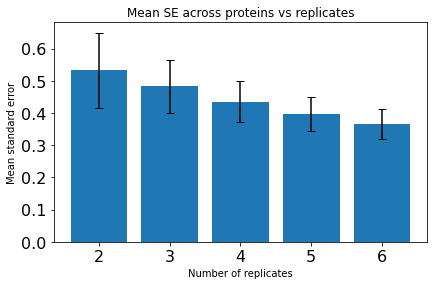

In [36]:
plt.figure()
plt.bar(metrics_df['n'], metrics_df['Mean_SE'], yerr=metrics_df['SD_SE'], capsize=4)
plt.xlabel('Number of replicates')
plt.ylabel('Mean standard error')
plt.title('Mean SE across proteins vs replicates')
plt.tight_layout()
plt.xticks(fontsize=16)  # Ensure all x-tick labels are shown
plt.yticks(fontsize=16)
plt.show()

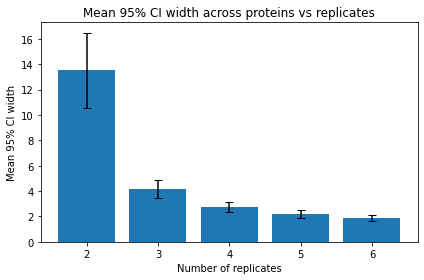

In [34]:


# Plot Mean CI width as bar chart
plt.figure()
plt.bar(metrics_df['n'], metrics_df['Mean_CI_width'], yerr=metrics_df['SD_CI_width'], capsize=4)
plt.xlabel('Number of replicates')
plt.ylabel('Mean 95% CI width')
plt.title('Mean 95% CI width across proteins vs replicates')
plt.tight_layout()
plt.show()